*   ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Appendix/'
OutputDir    = 'ANorm-06Lp-norm/'
FileBaseName = 'ANorm-06Lp-norm'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Appendix/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Appendix/ANorm-06Lp-norm/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Appendix/ANorm-06Lp-norm/


In [4]:
############################################
def Grf_LpNorm( lp_val = 1.0, p_ths = [1,2,8,32] ):
  #
  plt.rcParams['font.size'] = 20
  #
  fig = plt.figure(figsize=(8, 6))
  #
  fig.subplots_adjust(left=0.15, right=0.8, top=0.95, bottom=0.15)
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( r'$x_{1}$' )
  ax1.set_ylabel( r'$x_{2}$' )
  #
  ax1.set_xlim( -lp_val * 1.1, lp_val * 1.1  )
  ax1.set_ylim( -lp_val * 1.1, lp_val * 1.1  )
  #
  for p_th in p_ths:
    #
    x1_ = []
    x2_ = []
    #
    angs = np.linspace(0,360,num=361) / 180.0 * np.pi
    #
    for ang in angs:
      x1 = np.cos( ang )
      x2 = np.sin( ang )
      if x1 == 0.0:
        if x2 > 0:
          x2 = +lp_val
        else:
          x2 = -lp_val
      else:
        lp = (np.abs( x1 )**p_th + np.abs( x2 )**p_th)**(1.0 / p_th)
        x1 = x1 / lp * lp_val
        x2 = x2 / lp * lp_val
      #
      x1_.append(x1)
      x2_.append(x2)
    #
    ax1.plot( x1_, x2_, label = r'$L_{%d}$' % p_th )
  #
  plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  #
  plt.grid()
  plt.gca().set_aspect('equal')
  plt.show()
  #
  return fig

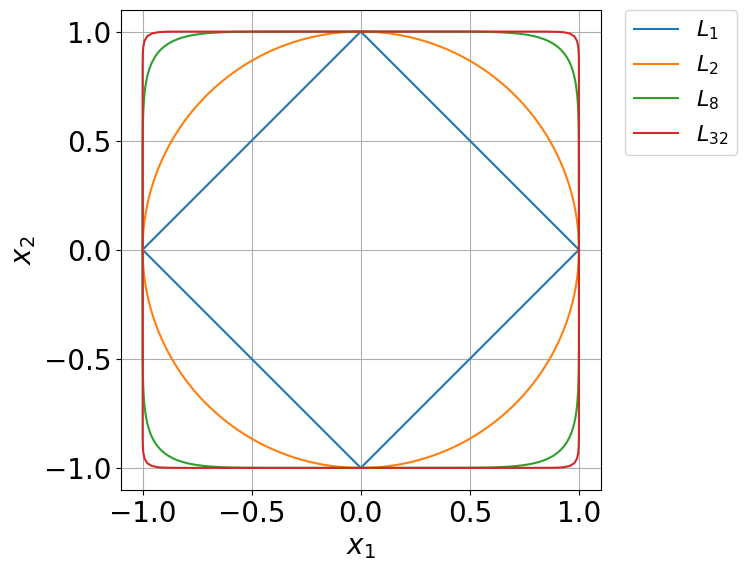

In [5]:
############################################
fig = Grf_LpNorm( lp_val = 1.0 )
# 図をpdfに保存
pdfName = FilePath + FileBaseName + '-01.pdf'
fig.savefig( pdfName )